# Simplex algorithm in python 3.5

Sample problem from CLRS 3rd ed., ch.29, pg.846

```
Maximise: 
    x_1 + x_2
    
Subject to:
    4*x_1 - x_2 <= 8
    2*x_1 + x_2 <= 10
    5*x_1 - 2*x_2 >= -2

Where:
    x_1, x_2 >= 0
```

Result should be `Maximum of 8.0 at x1=2.0, x2=6.0`. This is confirmed by scipy.optimise.linprog, or visually.

My function is returning `Maximum of 7.0 at x1=3.0, x2=4.0`. What's going wrong?


## My version:

In [1]:
def pivot(tableau, row, column):
    n = len(tableau[0])
    m = len(tableau) - 1
    pivot_value = tableau[row][column]

    for i in range(0, n):
        tableau[row][i] = tableau[row][i] / pivot_value

    for i in range(0,m+1):
        if i != row:
            ratio = tableau[i][column]
            for j in range(0, n):
                tableau[i][j] -= ratio * tableau[row][j]

    return tableau


def simplex(tableau):
    n = len(tableau[0])
    m = len(tableau) - 1

    optimal = False
    unbounded = False
    while (not optimal) and (not unbounded):
        pivot_column = 0
        min_value = 0.
        for i in range (1,(n-m)):
            if tableau[0][i] < min_value:
                min_value = tableau[0][i]
                pivot_column = i

        if pivot_column == 0:
            optimal = True
            continue

        pivot_row = 0
        min_ratio = -1.
        for i in range(1,(m+1)):
            if tableau[i][pivot_column] > 0:
                if ((tableau[i][0] / tableau[i][pivot_column]) < min_ratio) or (min_ratio == -1.):
                    min_ratio = (tableau[i][0] / tableau[i][pivot_column])
                    pivot_row = i

        if min_ratio == -1.:
            unbounded = True
            continue

        tableau = pivot(tableau, pivot_row, pivot_column)
        
    return tableau

def print_tableau(tableau):
    print("###")
    for row in tableau:
        print(row)        
    print("###")
    return

def get_basic_solution(tableau):
    n = len(tableau[0])
    m = len(tableau) - 1

    solution = []

    for c in range(1, n):
        non_zeros = 0
        non_zero = -1
        for r in range(0,m+1):
            if tableau[r][c] != 0:
                non_zeros += 1
                non_zero = r

        if non_zeros != 1:
            solution.append(0)
        else:
            solution.append(tableau[non_zero][0] / tableau[non_zero][c])
    
    return solution

In [2]:
'''
Example from CLRS 3rd ed., ch.29, pg.846

Maximise: 
    x_1 + x_2
    
Subject to:
    4*x_1 - x_2 <= 8
    2*x_1 + x_2 <= 10
    5*x_1 - 2*x_2 >= -2

Where:
    x_1, x_2 >= 0
'''

tableau = [[ 0., -1., -1., 0., 0., 0.],
          [ 8.,  4., -1., 1., 0., 0.],
          [10.,  2.,  1., 0., 1., 0.],
          [ 2., -5.,  2., 0., 0., 1.]]

result = simplex(tableau)
# print_tableau(result)
sol = get_basic_solution(result)

print("Maximum of {0} at x1={1}, x2={2}".format(result[0][0], sol[0], sol[1]))


Maximum of 7.0 at x1=3.0, x2=4.0


## Scipy.optimise version:

In [3]:
from scipy.optimize import linprog

c = [-1, -1] # convert objective to minimise
A = [[4, -1], 
     [2, 1],
     [-5, 2]] # convert >= to <=
b = [8, 10, 2]
bounds = [[0, None],
          [0, None]]

res = linprog(c, A, b, bounds=bounds)
print("Maximum of {0} at x1={1}, x2={2}".format(res.fun*-1, res.x[0], res.x[1]))

Maximum of 8.0 at x1=2.0, x2=6.0


## Graphical version:

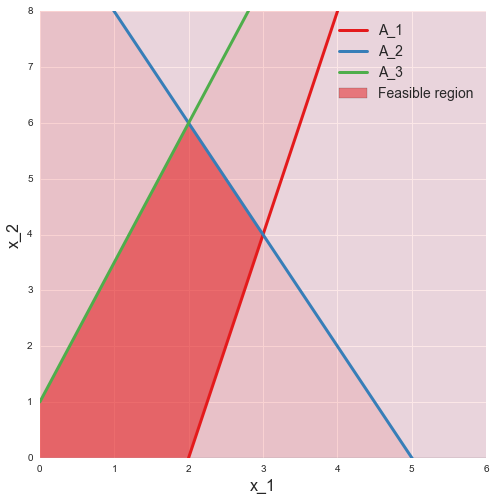

In [4]:
# need to update matplotlib sometime
from IPython.utils.shimmodule import ShimWarning
import warnings; warnings.simplefilter('ignore', ShimWarning)
from IPython.html import widgets

%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.path import Path
from matplotlib.patches import PathPatch

import seaborn as sns
sns.set_palette('Set1')

fig, ax = plt.subplots(figsize=(8, 8))
x_1 = np.linspace(0, 20)

# Constraint A_1: x_2 >= 4*x_1 - 8
plt.plot(x_1, 4*x_1 - 8, lw=3, label='A_1')
plt.fill_between(x_1, 10, 4*x_1 - 8, alpha=0.1)

# Constraint A_2: x_2 <= 10 - 2*x_1
plt.plot(x_1, 10 - 2*x_1, lw=3, label='A_2')
plt.fill_between(x_1, 0, 10 - 2*x_1, alpha=0.1)

# Constraint A_3: x_2 <= 1 + 2.5*x_1
plt.plot(x_1, 1 + 2.5*x_1, lw=3, label='A_3')
plt.fill_between(x_1, 0, 1 + 2.5*x_1, alpha=0.1)

# highlight the feasible region
path = Path([
    (0., 0.),
    (0., 1.),
    (2., 6.),
    (3., 4.),
    (2., 0.),
])
patch = PathPatch(path, label='Feasible region', alpha=0.5)
ax.add_patch(patch)

# labels and stuff
plt.xlabel('x_1', fontsize=16)
plt.ylabel('x_2', fontsize=16)
plt.xlim(0, 6)
plt.ylim(0, 8)
plt.legend(fontsize=14)
plt.show()